# Overall Project:
### Based off of https://medium.com/@mjbhobe/mnist-digits-classification-with-keras-ed6c2374bd0e
* import & set global variables
* define load function
* define display data function
* load data
* display 50 samples
* import keras
* define construct keras model
* construct keras model
* train model (split load between CPU and GPU) (is timed)
* display loss & acuracy graphs
* reverse one-hot and show 50 predictions compared with the true values
* Saving & Loading the trained weights and model
* Input image(can be any size)
* Frontend
* Example graphs for different Values of alpha(Adam)
* Generated images can have random line thickness
* image generation for filled shape case
* cropped image as background
* Edge detection
* Fit shape to image size
* list Wrong predictions for finding corelations
* consecutive training on separate datasets
### TO-DO:
* generate image with resize blur
* Autoencoder with PCA(principle component analysis(CodeParade))

* Example graphs for different sized convolution kernel sizes(ex 3x3->85%, 9x9->93%,6x6->94%)(pool layers too?)
* Example graphs for different count of input data
* Example graphs for different epoch sizes
* Example graphs for resized data to make it more blurry
* Example graphs for randomised thickness of lines
* Example graphs for filled, unfilled and mixt shapes

* Slliding window for input image
* Visualising intermediate layer output of CNN
* Visualization of the Feature Maps Extracted
### Tentative:
* Remove most or all hardcoding: Image height width shape num classes class names
* Load data in batches
* Maybe use image segmentation but most probably does not utilise trained network
* Check output on optical illusions(triangle made of 3 4/5 circles)

In [1]:
%run commonCode

Using TensorFlow backend.


Loaded the images of dataset-Ellipse

Loaded the images of dataset-Quadrilateral

Loaded the images of dataset-Triangle



Displaying a random sample of 50 images from dataset


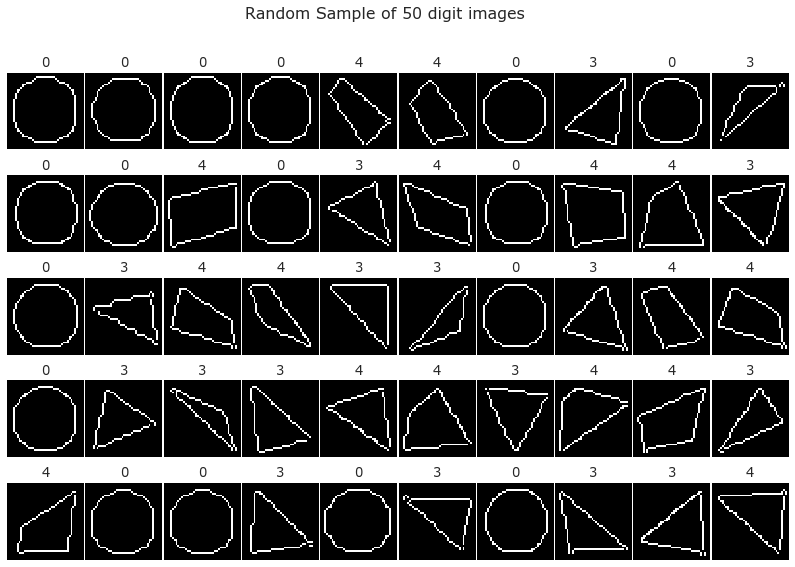

In [2]:
# display 50 random samples
sample_size = 50
print('Displaying a random sample of {} images from dataset'.format(sample_size))
indexes = np.random.randint(0, test_images.shape[0], sample_size)
sample_images, sample_labels = test_images[indexes], test_labels[indexes]
display_sample(sample_images, sample_labels, sample_predictions=None, num_rows=5, num_cols=10, 
               plot_title="Random Sample of {} digit images".format(sample_size))

# Keras Implementation
We will develop model using Keras' Sequential API, which is much simpler to understand that the Functional API.

In [3]:
#replaced keras with tensorflow.compat.v2.keras.
# import tensorflow.compat.v2.keras.backend as K
# from tensorflow.compat.v2.keras.models import Sequential
# from tensorflow.compat.v2.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
# from tensorflow.compat.v2.keras import optimizers
# import kr_helper_funcs as kru

import tensorflow.keras.backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import optimizers
import kr_helper_funcs as kru

# clear the Tensorflow backend to get rid of any spurious graphs
#K.clear_session()

In [4]:
def build_keras_model():
    K.clear_session()
    
    model = Sequential()
    model.add(Conv2D(64, kernel_size=KERNEL_SIZE, padding='same', activation='relu',
                    input_shape=IMAGE_SHAPE))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(64, kernel_size=KERNEL_SIZE, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dropout(0.45))
    # output is softmax for 10 classes
    model.add(Dense(num_classes, activation='softmax'))
    adam = optimizers.Adam(lr=alpha)
    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [5]:
kr_model = build_keras_model()
print(kr_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 40, 40, 64)        5248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        331840    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 3)                 1

In [6]:
# train the model
%time history = kr_model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,validation_data=(X_val, y_val))

Train on 48000 samples, validate on 9600 samples
Epoch 1/15
48000/48000 [==============================] - 10s 208us/sample - loss: 0.3207 - acc: 0.8522 - val_loss: 0.2049 - val_acc: 0.9192
Epoch 2/15
48000/48000 [==============================] - 6s 116us/sample - loss: 0.1788 - acc: 0.9274 - val_loss: 0.1359 - val_acc: 0.9493
Epoch 3/15
48000/48000 [==============================] - 6s 117us/sample - loss: 0.1447 - acc: 0.9444 - val_loss: 0.1249 - val_acc: 0.9559
Epoch 4/15
48000/48000 [==============================] - 6s 126us/sample - loss: 0.1280 - acc: 0.9517 - val_loss: 0.1120 - val_acc: 0.9601
Epoch 5/15
48000/48000 [==============================] - 6s 128us/sample - loss: 0.1182 - acc: 0.9570 - val_loss: 0.1025 - val_acc: 0.9631
Epoch 6/15
48000/48000 [==============================] - 6s 120us/sample - loss: 0.1112 - acc: 0.9582 - val_loss: 0.1027 - val_acc: 0.9648
Epoch 7/15
48000/48000 [==============================] - 6s 126us/sample - loss: 0.1073 - acc: 0.9596 - val_l

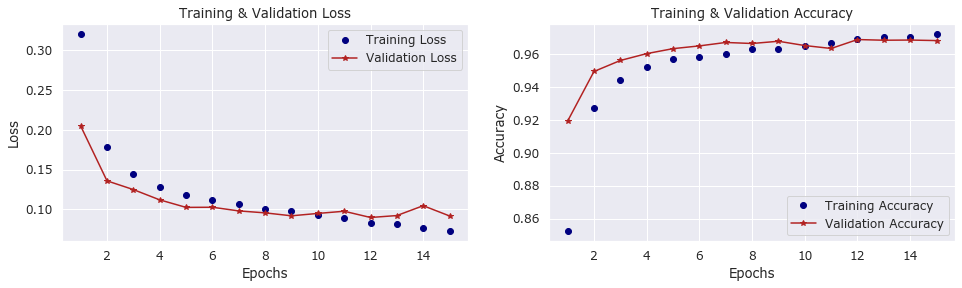

In [7]:
# display plots of loss & accuracies
kru.show_plots(history.history)

In [8]:
# evaluate performance against train/cross-val & test data
print('Evaluating performance of Keras model:')
loss, acc = kr_model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print(' - Training dataset: loss = {:.4f}, accuracy = {:.4f}'.format(loss, acc))

loss, acc = kr_model.evaluate(X_val, y_val, batch_size=BATCH_SIZE, verbose=0)
print(' - Cross-validation dataset: loss = {:.4f}, accuracy = {:.4f}'.format(loss, acc))

loss, acc = kr_model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
print(' - Test dataset: loss = {:.4f}, accuracy = {:.4f}'.format(loss, acc))

Evaluating performance of Keras model:
 - Training dataset: loss = 0.0518, accuracy = 0.9795
 - Cross-validation dataset: loss = 0.0917, accuracy = 0.9680
 - Test dataset: loss = 0.0969, accuracy = 0.9642


# Saving Model

In [9]:
# save model and architecture to single file
kr_model.save(KR_MODEL_NAME)
print("Saved model to disk")

Saved model to disk


In [10]:
predictions = kr_model.predict(X_test)
# reverse one-hot encode the predictions
y_pred = np.argmax(predictions, axis=1)
# reverse one-hot encode of test data (this is the ground truth)
y_true = np.argmax(y_test, axis=1)
#y_pred[:30]
# count of predictions & how many incorrect predictions overall??
len(y_pred), (y_pred != y_true).sum()

(2400, 86)

Displaying a sample of 50 mistaken images from dataset


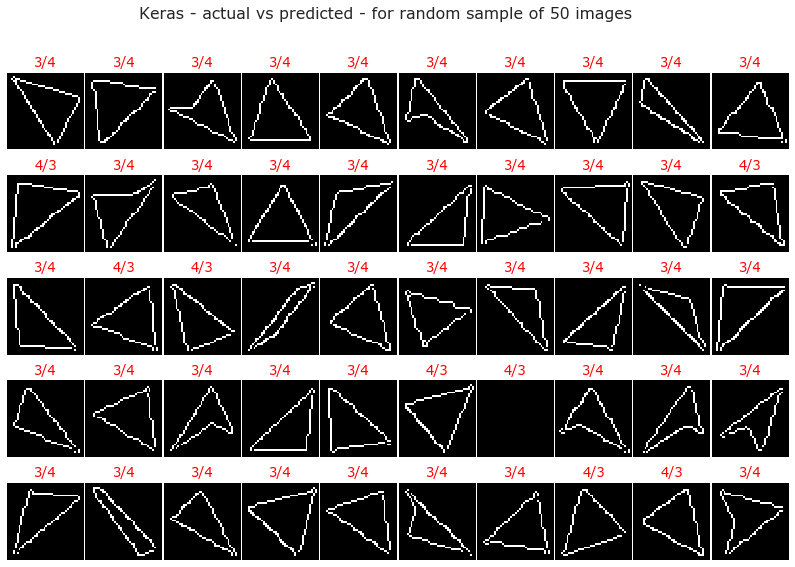

In [11]:
# NOTE: the title of each cell shows the predicted value in green if prediction matches actual
# else cell title shows actual/predicted value in red font
sample_size = 50
print('Displaying a sample of {} mistaken images from dataset'.format(sample_size))
indexes = np.where(y_pred != y_true)[0].astype('int32')[:sample_size]
sample_images, sample_labels, sample_predictions = test_images[indexes], test_labels[indexes], y_pred[indexes]
display_sample(sample_images, sample_labels, sample_predictions=sample_predictions, 
               num_rows=5, num_cols=10, 
               plot_title="Keras - actual vs predicted - for random sample of {} images".format(sample_size))

In [16]:
import gc #garbage collector
gc.collect()

81051